# Derivación numérica

## Introducción

La *derivada* representa la tasa de cambio de una variable dependiente respecto de una variable independiente. Es una herramienta de uso común en diversas áreas de ingeniería, por ejemplo:

<img src="./images/ejemplos_derivadas.png" width="700px" align= center>

En todos estos ejemplos, la variable independiente corresponde a la posición $x$.

## Diferencias Finitas


### Derivada de primer orden
Matemáticamente, representamos la derivada $f'(x)$ de una función $f(x)$ en el punto $x=a$ como: 

\begin{equation*}
\frac{df}{dx} = \lim_{a\rightarrow 0}\frac{f(x+a)-f(x)}{a}
\end{equation*}

Gráficamente, para $a = x_i$ entre dos valores igualmente espaciados $x_{i-1}$ y $x_{i+1}$, con $h = x_i - x_{i-1}$, tenemos tres alternativas para aproximar $f'(x_i)$:

<img src="./images/first_order_derivative.png" width="800px" align= center>

Esta aproximación se denomina **diferencias finitas**.

Al igual que en la unidad anterior, podemos usar series de Taylor para evaluar el error de truncamiento asociado a cada aproximación.

Consideremos la serie de Taylor de $f(x)$ centrada en $x_i$:

\begin{align*}
f(x) &= \frac{f(x_i)(x - x_i)^0}{0!} + \frac{f^{\prime}(x_i)(x - x_j)^1}{1!} + \frac{f''(x_i)(x - x_i)^2}{2!} + \frac{f'''(x_i)(x - x_i)^3}{3!} + \cdots \\[10pt]
&= f(x_i) + f^{\prime}(x_i)(x - x_i) + \frac{f''(x_i)}{2}(x - x_i)^2 + \frac{f'''(x_i)}{6}(x - x_i)^3 + \cdots
\end{align*}


Evaluando esta expansión en $x_{i-1}$, 

\begin{equation*}
f(x_{i-1})= f(x_i) + f^{\prime}(x_i)(x_{i-1} - x_i) + \frac{f''(x_i)}{2}(x_{i-1} - x_i)^2 + \frac{f'''(x_i)}{6}(x_{i-1} - x_i)^3 + \cdots
\end{equation*}

y despejando $f'(x_i)$, obtenemos la **fórmula de derivada hacia atrás**:

\begin{equation}
f'(x_i) = \frac{f(x_{i}) - f(x_{i-1})}{x_{i} - x_{i-1}} + O(h)
\end{equation}


Similarmente, si evaluamos la expansión en $x_{i+1}$, 

\begin{equation*}
f(x_{i+1})= f(x_i) + f^{\prime}(x_i)(x_{i+1} - x_i) + \frac{f''(x_i)}{2}(x_{i+1
} - x_i)^2 + \frac{f'''(x_i)}{6}(x_{i+1
}- x_i)^3 + \cdots
\end{equation*}

y luego despejamos $f'(x_i)$, obtenemos la **fórmula de derivada hacia adeltante**:

\begin{equation}
f'(x_i) = \frac{f(x_{i+1}) - f(x_{i})}{x_{i+1} - x_{i}} + O(h)
\end{equation}

Finalmente, consideremos la diferencia $f(x_{i+1}) - f(x_{i-1})$, con $x_{i+1} - x_i = h$ y $x_{i-1} - x_i = -h$:

\begin{equation*}
f(x_{i+1}) - f(x_{i-1}) = f'(x_i)2h + \frac{f'''(x_i)}{3!}2h^3 + \frac{f'''(x_i)}{5!}2h^5 + \cdots
\end{equation*}

Despejando para $f'(x_i)$, obtenemos la **fórmula para derivada central**:

\begin{equation}
f'(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1} - x_{i-1}} + O(h^2)
\end{equation}

A partir de este análisis podemos concluir que la derivada central tiene un mayor orden de presición.

Comprobemos esto con la derivada del polinomio:

\begin{equation*}
f(x) = -0.1x^4 - 0.15x^3 - 0.5x^2 - 0.25x+1.2
\end{equation*}

en $x = 0.5$, y considerando $h=0.10$. 

Para comprobar el error consideraremos el valor exácto $f'(5)=-0.9125$

In [1]:
f = lambda x: -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
df_exact = -0.9125

h = 0.1              # espaciamiento
xi = 0.5             # valor central
x = [xi-h, xi, xi+h] # puntos a evaluar

df_bw = (f(x[1]) - f(x[0]))/(x[1] - x[0]) # derivada hacia atrás
df_fw = (f(x[2]) - f(x[1]))/(x[2] - x[1]) # derivada hacia adelante
df_ct = (f(x[2]) - f(x[0]))/(x[2] - x[0]) # derivada central

print("f'(5) = %-5f; Error = %.5f (Derivada hacia atrás)"    % (df_bw, abs(df_exact - df_bw)))
print("f'(5) = %-5f; Error = %.5f (Derivada hacia adelante)" % (df_fw, abs(df_exact - df_fw)))
print("f'(5) = %-5f; Error = %.5f (Derivada central)"        % (df_ct, abs(df_exact - df_ct)))

f'(5) = -0.828400; Error = 0.08410 (Derivada hacia atrás)
f'(5) = -1.003600; Error = 0.09110 (Derivada hacia adelante)
f'(5) = -0.916000; Error = 0.00350 (Derivada central)


A partir de este resultado, vemos como el error de diferencia hacia atrás y adelante es $O(h) \sim 0.1$, mientras que para diferencia central el error es $O(h^2) \sim 0.01$

Como segundo ejemplo, evaluemos el crecimiento del error en este problema a medida que aumentamos $h$

In [2]:
import numpy as np

xi = 0.5                          # valor central
h_array = np.logspace(-5,0,20)  # arreglo de h desde 10^-5 a 10^0
#h_array = np.linspace(0.00001,0.1,20)

# Creamos un arreglo de ceros para cada error. Este arreglo será 
# completado en un loop para cada valor de "h"
error_bw = np.zeros(h_array.shape)      # Error por diferencia hacia atrás
error_fw = np.zeros(h_array.shape)      # Error por diferencia hacia adelante
error_ct = np.zeros(h_array.shape)      # Error por diferencia central

# generamos un loop respecto a los índices de h_array
for j in range(len(h_array)):
    h = h_array[j]
    x = [xi-h, xi, xi+h] # puntos a evaluar
    df_bw = (f(x[1]) - f(x[0]))/(x[1] - x[0]) # derivada hacia atrás
    df_fw = (f(x[2]) - f(x[1]))/(x[2] - x[1]) # derivada hacia adelante
    df_ct = (f(x[2]) - f(x[0]))/(x[2] - x[0]) # derivada central
    
    # almacenamos el error de cada caso en un arreglo
    error_bw[j] = abs(df_exact - df_bw)
    error_fw[j] = abs(df_exact - df_fw)
    error_ct[j] = abs(df_exact - df_ct)    

In [3]:
%%capture showplot1
import matplotlib.pyplot as plt
from numpy import log, polyfit

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 12}) # Tamaño de fuente

plt.plot(h_array,error_bw,'ob',label='backward',alpha=0.5)
plt.plot(h_array,error_fw,'or',label='forward' ,alpha=0.5)
plt.plot(h_array,error_ct,'ok',label='central' ,alpha=0.5)

# analizamos la pendiente del logaritmo de cada aproxmación
abw = polyfit(log(h_array), log(error_bw),1)
afw = polyfit(log(h_array), log(error_fw),1)
act = polyfit(log(h_array), log(error_ct),1)

# imprimimos el valor de la pendiente en el gráfico
plt.text(1E-4,1E-5,'$\sim h^{%.3f}$' % abw[0], color='b')
plt.text(1E-4,1E-3,'$\sim h^{%.3f}$' % afw[0], color='r')
plt.text(1E-4,1E-9,'$\sim h^{%.3f}$' % act[0], color='k')

# graficamos en escala logarítmica para visualizar la pendiente
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Espaciamiento, $h$')
plt.ylabel("Error absoluto")
plt.title("Derivada de $f(x) = -0.1x^4 - 0.15x^3 - 0.5x^2 - 0.25x+1.$")
plt.legend(frameon=False, loc='lower right')
plt.show()

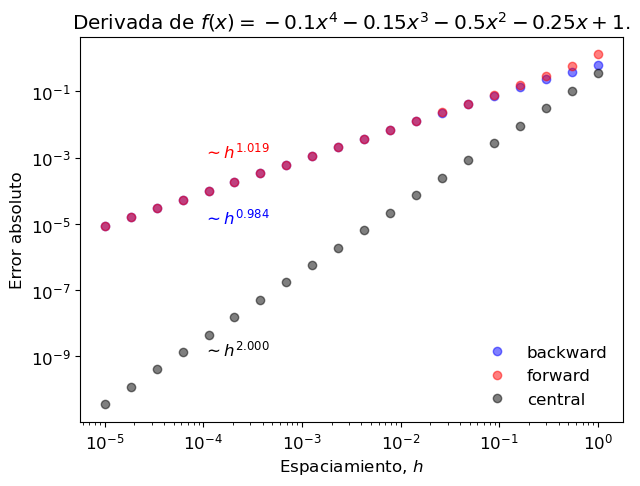

In [4]:
showplot1()

### Derivadas de segundo o mayor orden

Mediante un procedimiento similar, podemos generar aproximaciónes de diferencias finitas para derivadas de mayor orden.

Por ejemplo, consideremos la suma de las expansiones $f(x_{i+1})$ y $f(x_{i-1})$ centradas en $x_i$,

\begin{equation*}
f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + h^2f''(x_j) + \frac{h^4f''''(x_j)}{24} + \cdots
\end{equation*}

Despejando para $f''(x_i)$, obtenemos la fórmula para la segunda derivada por diferencia central:

\begin{equation*}
f''(x_j) = \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2} + O(h^2)
\end{equation*}

Podemos extender nuestro resultado para determinar fórmulas de diferencas finitas para derivadas de mayor orden. A continuación mostramos un resumen con algunas de estas fórmulas:

**Diferencia hacia adelante**

<img src="./images/forward_difference.png" width="800px" align= center>

**Diferencia hacia atrás**

<img src="./images/backward_difference.png" width="800px" align= center>

**Diferencia central**

<img src="./images/central_difference.png" width="800px" align= center>

### Derivadas parciales
Podemos extender las fórmulas de diferencias finitas anteriores para derivadas parciales.

Por ejemplo, utilizando diferencia central:

\begin{align*}
\frac{\partial f_{ij}}{\partial x} &= \frac{f(x_{i+1},y_i) - f(x_{i-1},y_i)}{2\Delta x}+O(\Delta x^2)\\[10pt]
\frac{\partial f_{ij}}{\partial y} &= \frac{f(x_i,y_{i+1}) - f(x_i,y_{i-1})}{2\Delta y}+O(\Delta y^2)\\[10pt]
\frac{\partial^2 f_{ij}}{\partial x^2} &= \frac{f(x_{i+1},y_i) - 2f(x_i
,y_i) + f(x_{i-1},y_i)}{\Delta x^2}+O(\Delta x^2)
\end{align*}

## Diferencias Finitas en Python

Podemos clasificar las funciones de derivadas de python, en dos tipos:
- Derivación mediate datos tabulados: ```numpy.diff```, ```numpy.gradient```, ```scipy.interpolate.CubicSpline```.
- Derivación mediante función conocida: ```scipy.misc.derivative```

### Diferencias finitas con datos tabulados

Consideremos el siguiente set de datos tabulados $x_i$ y $f(x_i)$ correspondientes a la función $f(x) = \sin(x)$.

In [5]:
# Valores xi tabulados (no igualmente espaciados)
xi = np.array([ 0,  0.72878679,  1.23516778,  2.00081088,  2.77801068, 3.10970675,  3.93589864,  4.14861853,  5.18938779,  5.39179938, 2*np.pi])
# Valores yi = sin(xi) tabulados
yi = np.array([ 0,  0.66596509,  0.94420348,  0.90895968,  0.35562432, 0.0318805 , -0.71337743, -0.84524628, -0.88837681, -0.77794332, 0])

In [6]:
%%capture showplot2
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

# Graficamos sin(x) y junto con (xi,yi)
f = lambda x: np.sin(x)
x = np.linspace(0,2*np.pi,100)

plt.plot(xi,yi,'or')  # datos tabulados
plt.plot(x,f(x),':b') # función sin(x)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid()
plt.show()

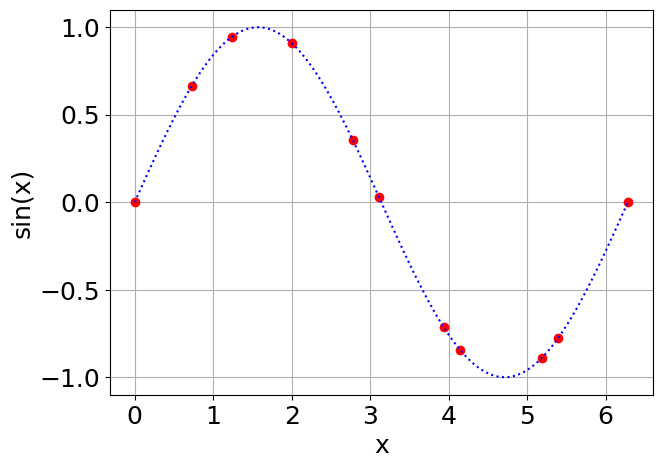

In [7]:
showplot2()

#### ```numpy.diff```
Esta función determina la diferencia entre 
los dos valores más cercanos en un arreglo.

En otras palabras, para un arreglo `x[0],x[1], ... x[n]`, 

`numpy.diff =  x[1] - x[0], x[2] - x[1], ... , x[n]- x[n-1]`. 

Así, para un arreglo de tamaño $N$, `numpy.diff` entrega un arreglo de tamaño $N-1$.

Si bien la función no entrega la derivada directamente, se puede usar para determinar $f'(x)$ de forma sencilla. Así, para un arreglo de valores `xi`, `yi`, $f'(x)$ se puede determinar por:
```python
dfdx = np.diff(yi)/np.diff(xi) # f'(x)
```

Debido a la forma en la que opera `numpy.diff`, **el resultado corresponde a diferencia hacia adeltante o hacia atrás**. Esto dependiendo de como asignemos `dfdx[i]`.

Evaluemos la función `numpy.diff` en nuestro ejemplo con datos tabulados. Comparamos el resultado con el valor exácto $f'(x) = \cos(x)$.

In [8]:
%%capture showplot3
# Evaluamos numpy.diff
dfdx = np.diff(yi)/np.diff(xi)

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 16}) # Tamaño de fuente

plt.plot(xi[1:],dfdx,'ob',label='backward')
plt.plot(xi[:-1] ,dfdx,'or',label='forward')
plt.plot(x,np.cos(x),':k',label='$\cos (x)$')

plt.legend()
plt.xlabel('x')
plt.ylabel("$f'(x) = \cos(x)$")
plt.show()

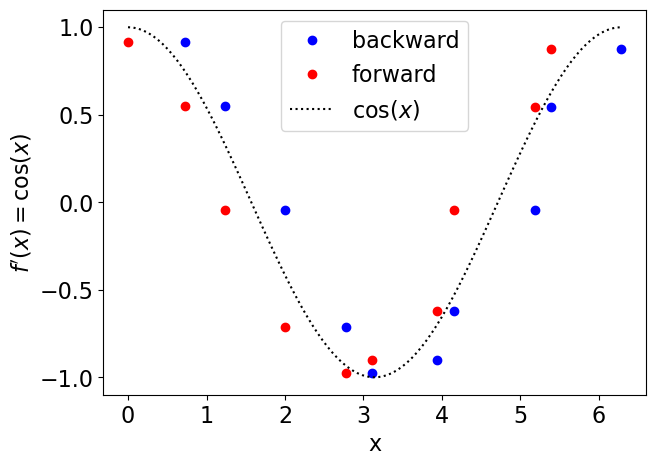

In [9]:
showplot3()

####  ```numpy.gradient```
Esta es una función más optimizada y específica para calcular derivadas. La función `gradient` calcula *directamente* la derivada de una función
 ```python
 dfdx = np.gradient(yi,xi) # f'(x)
 ```

Para los valores centrales  `gradient` **utiliza diferencia central**, y para los valores extremos diferencia hacia atrás o hacia adelante, es decir:
```python
dfdx[0] = (y[1] - y[0]  )/(x[1] - x[0])    # diferencia hacia adelate
dfdx[n] = (y[n] - y[n-1])/(x[n] - x[n-1])  # diferencia hacia atrás
```

Así, para un arreglo de tamaño $N$, `numpy.gradient` entrega un arreglo de tamaño $N$.

Evaluemos la función `numpy.gradient` en nuestro ejemplo con datos tabulados. Comparamos el resultado con el valor exácto $f'(x) = \cos(x)$.

In [10]:
%%capture showplot4
# Evaluamos numpy.diff
dfdx = np.gradient(yi,xi)

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 16}) # Tamaño de fuente

plt.plot(xi,dfdx,'or',label='gradient')
plt.plot(x,np.cos(x),':k',label='$\cos (x)$')

plt.legend()
plt.xlabel('x')
plt.ylabel("$f'(x) = \cos(x)$")
plt.show()

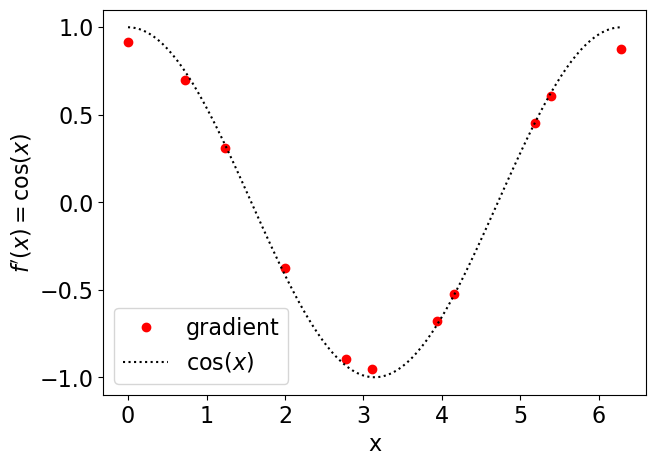

In [11]:
showplot4()

#### `CubicSpline.derivative`
Una tercera alternativa para determinar la derivada es mediante la función ```CubicSpline``` de ```scipy.interpolate```. A diferencia de ```diff``` y ```gradient```, ```CubicSpline``` permite determinar derivadas de segundo y tercer orden directamente.
```python
from scipy.interpolate import CubicSline
dfdx  = CubicSpline(xi,yi).derivative(1) # función f'(x)   a partir de spline cúbico
dfdx2 = CubicSpline(xi,yi).derivative(2) # función f''(x)  a partir de spline cúbico
dfdx3 = CubicSpline(xi,yi).derivative(3) # función f'''(x) a partir de spline cúbico
```
> **NOTA** En el ejemplo estamos generando una variable de tipo **callable**. Es decir, si queremos saber $f'(x_i)$ debemos ejecutar ```dfdx(xi)```

Debido a que `CubicSpline` está basada en un polinomio de orden 3, la función aproximada tiene un error del orden $O(h^4)$. Así, la primera derivada de `CubicSpline` tiene un error del orden $O(h^3)$, la segunda $O(h^2)$, y la tercera $O(h)$.

Alternativamente, según lo revisado en la unidad de [interpolación](https://panxopanza.github.io/metodos_numericos_mec301/4-Interpolacion/4-Interpolacion.html#interpolacion-spline-cubico), podemos usar ```CubicSpline``` para determinar la derivada mediante:
```python
from scipy.interpolate import CubicSline
y  = CubicSpline(xi,yi) # función f(x) a partir de spline cúbico
dfdx = y(xi,1) # f'(xi) 
```

Analicemos el ejemplo con datos tabulados usando CubicSpline

In [12]:
%%capture showplot5
from scipy.interpolate import CubicSpline
# generamos una función de interpolación
dfdx = CubicSpline(xi,yi).derivative(1)

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 16}) # Tamaño de fuente

plt.plot(xi,dfdx(xi),'or',label='CubicSpline')
plt.plot(x,np.cos(x),':k',label='$\cos (x)$')

plt.legend()
plt.xlabel('x')
plt.ylabel("$f'(x) = \cos(x)$")
plt.show()

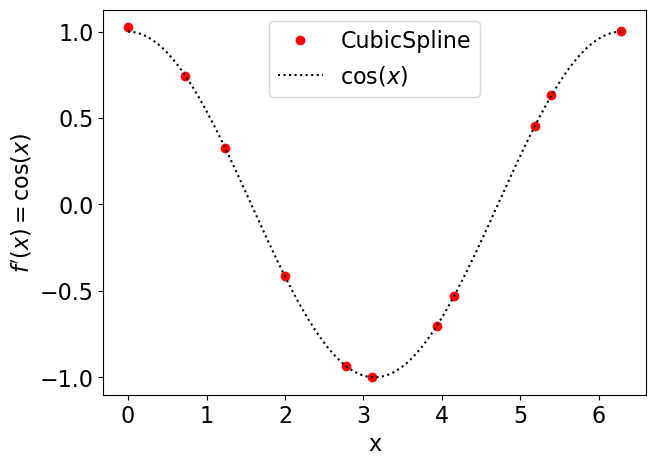

In [13]:
showplot5()

### Derivada de una función conocida

Si la función a derivar es conocida, podemos usar ```scipy.misc.derivative``` para determinar la derivada. 
La derivada es aproximada mediante diferencia central.
```python
from scipy.misc import derivative
dfdx = derivative(fun,x0,dx=h)
```
donde:
- `fun`: función a derivar en formato *callable*
- `x0`: valor donde se evalúa la derivada, formato *float*
- `dx`: espaciamiento $h$. Por defecto `dx=1`

La función solo admite un valor tipo *float* para evaluar la derivada. Sin embargo, es una buena alternativa para determinar la derivada en un punto $x_0$, sin la necesidad de generar un arreglo.

Por ejemplo, analicemos la derivada de $f(x)=\sin(x)$ en $x_0 = \pi/3$, a medida que reducimos el espaciameniento $h$. Como valor exacto tenenmos $f'(\pi/3)=\cos(\pi/3) = 1/2$

In [14]:
from scipy.misc import derivative

f = lambda x: np.sin(x)                   # función en formato callable
h_array = np.array([0.5,0.4,0.3,0.2,0.1]) # arreglo de espaciamiento h 
x0 = np.pi/3                              # punto de evaluación de la derivada
dfdx_exact = 0.5                          # valor exacto de la derivada

for h in h_array:
    dfdx = derivative(f,x0,dx=h)
    print('h = %.3f, dfdx = %.3f, error = %.3e' % (h, dfdx,abs(dfdx - dfdx_exact)))

h = 0.500, dfdx = 0.479, error = 2.057e-02
h = 0.400, dfdx = 0.487, error = 1.323e-02
h = 0.300, dfdx = 0.493, error = 7.466e-03
h = 0.200, dfdx = 0.497, error = 3.327e-03
h = 0.100, dfdx = 0.499, error = 8.329e-04


/tmp/ipykernel_24979/2525851843.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dfdx = derivative(f,x0,dx=h)


## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 2: Numerical Diferenciation** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Capítulo 23: Diferenciación numérica** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011
